<a href="https://colab.research.google.com/github/nobrregaa/portfolio/blob/main/CASE_MERCADO_DE_GAMES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # Biblioteca para Modelagem e Matrizez
import pandas as pd
import numpy as np

# Biblioteca para Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Biblioteca para ignorar avisos
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Lendo os dados
Base_Dados = pd.read_csv('/content/PS4_GamesSales.csv', encoding='latin-1')
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [4]:
# Verificar Dimensão da Base de Dados
Base_Dados.shape

(1034, 9)

In [5]:
# Verificar Campos Nulos
Base_Dados.isnull().sum()

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


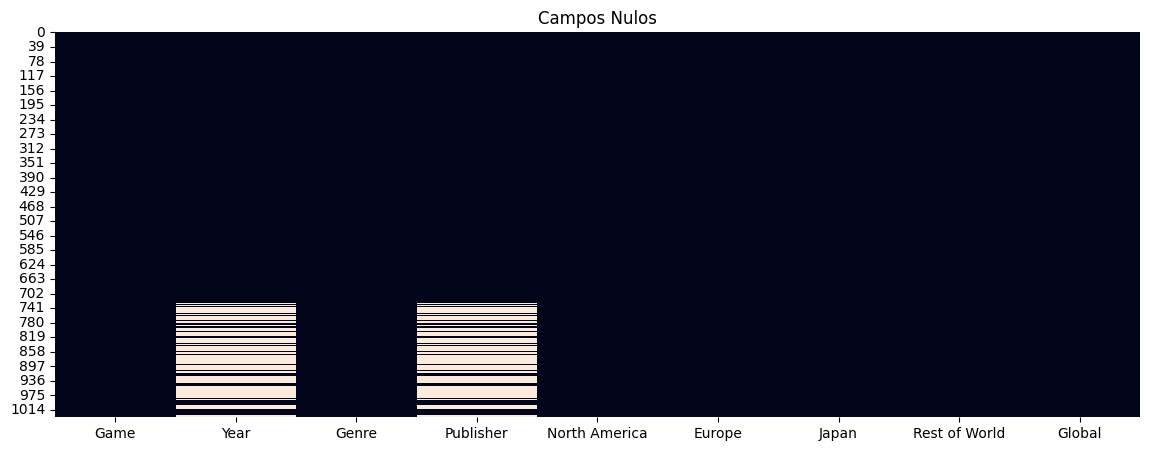

In [6]:
# Gráfico Campos Nulos
plt.figure(figsize=(14,5))
plt.title('Campos Nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False);


In [7]:
# Removendo Campos Nulos
Base_Dados.dropna( inplace=True)

In [8]:
# Estatisticas
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


Text(0, 0.5, 'Quantidade de Vendas (Mi)')

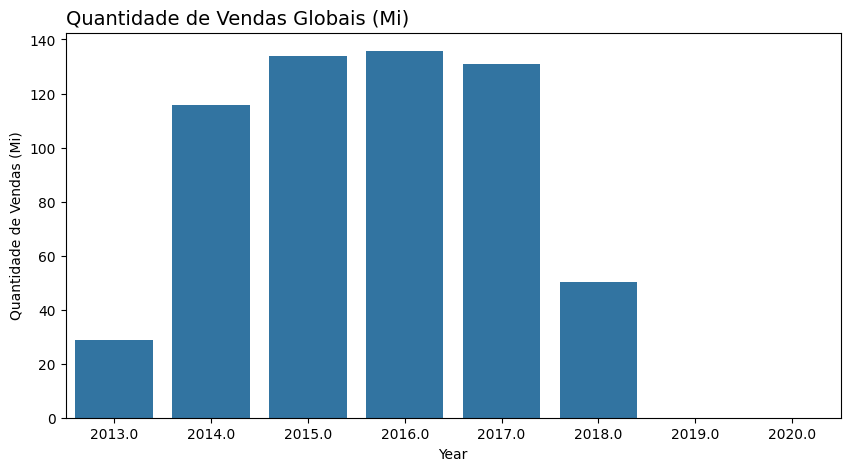

In [9]:
# Tamanho do Gráfico
plt.figure(figsize=(10,5))

# Titulo do Gráfico
plt.title('Quantidade de Vendas Globais (Mi)', loc='left', fontsize=14 )

# Gráfico
sns.barplot(data=Base_Dados, x='Year', y='Global', ci=None, estimator=sum)

# Label
plt.ylabel('Quantidade de Vendas (Mi)')

In [10]:
# Retirar os anos
Base_Dados = Base_Dados.loc[ (Base_Dados['Year'] != 2019) & (Base_Dados['Year'] != 2020)]

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


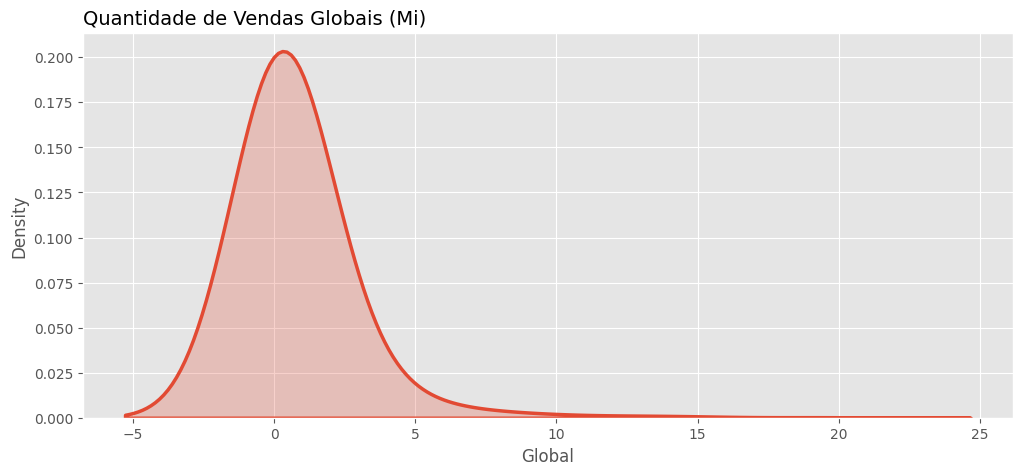

In [11]:
# Tamanho
plt.figure(figsize=(12,5))

# Estilo
plt.style.use('ggplot')

# Titulo
plt.title('Quantidade de Vendas Globais (Mi)', loc='left', fontsize=14 )

# Gráfico

sns.kdeplot(Base_Dados['Global'], shade=True, bw=1, linewidth=2.5);

In [12]:
Analise = Base_Dados.groupby( by=['Year']).sum()

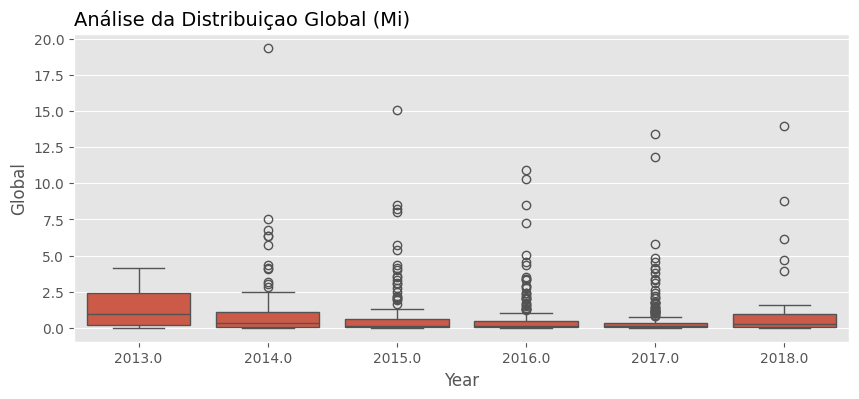

In [13]:
# Tamanho
plt.figure(figsize=(10,4))

# Titulo
plt.title('Análise da Distribuiçao Global (Mi)', loc='left', fontsize=14 )

# Gráfico
sns.boxplot(data=Base_Dados, x='Year', y='Global');


In [14]:
Base_Dados.loc[Base_Dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [15]:
Base_Dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [16]:
# Analisando a proporção dos 100% de cada continente comparada ao Total

America = [ America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa = [ Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao  = [ Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip(Analise['Rest of World'], Analise['Global'])]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

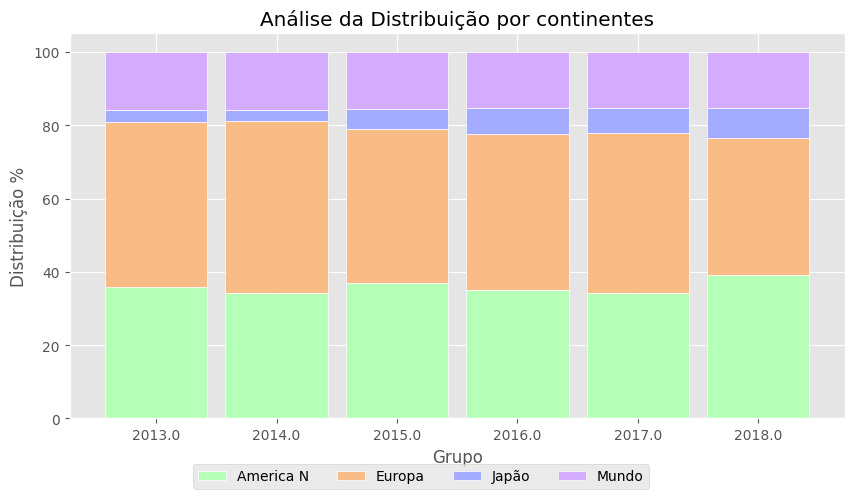

In [33]:
# Tamanho do Gráfico
plt.figure(figsize=(10,5))

# Largura barra no Gráfico
Largura_Barra = 0.85
Rotulos = Analise.index
Grupos = [0,1,2,3,4,5]

# Titulo
plt.title('Análise da Distribuição por continentes');

# Plot da America
plt.bar(Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white')

# Plot da Europa
plt.bar(Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white')

# Plot da Japão
plt.bar(Grupos, Japao, bottom=[A + B for A, B in zip(America, Europa)], width=Largura_Barra, color='#a3acff', edgecolor='white')

# Plot do Resto do Mundo
plt.bar(Grupos, Mundo, bottom=[A + B + C for A, B, C in zip(America, Europa, Japao)], width=Largura_Barra, color='#d3acfe', edgecolor='white')

# Labels
plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);


In [34]:
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [37]:
# Transformando valores categoricos em valores númericos

from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

Base_Dados['Produtor'] = Funcao_Label.fit_transform(Base_Dados['Publisher'])
Base_Dados['Genero'] = Funcao_Label.fit_transform(Base_Dados['Genre'])
Base_Dados['Jogo'] = Funcao_Label.fit_transform(Base_Dados['Game'])

Base_Dados.head()


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [38]:
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.96038885399407, 0.3814317878772117, 0.8683117650835491)]

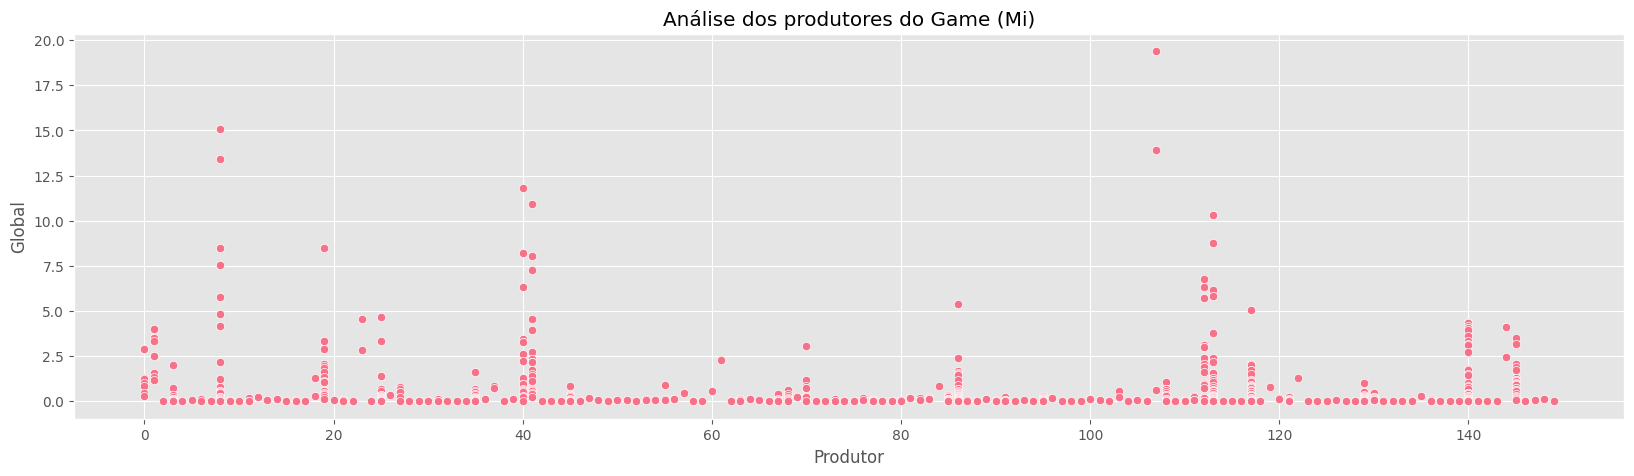

In [50]:
plt.figure(figsize=(20,5))
plt.title('Análise dos produtores do Game (Mi)')
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[0]);

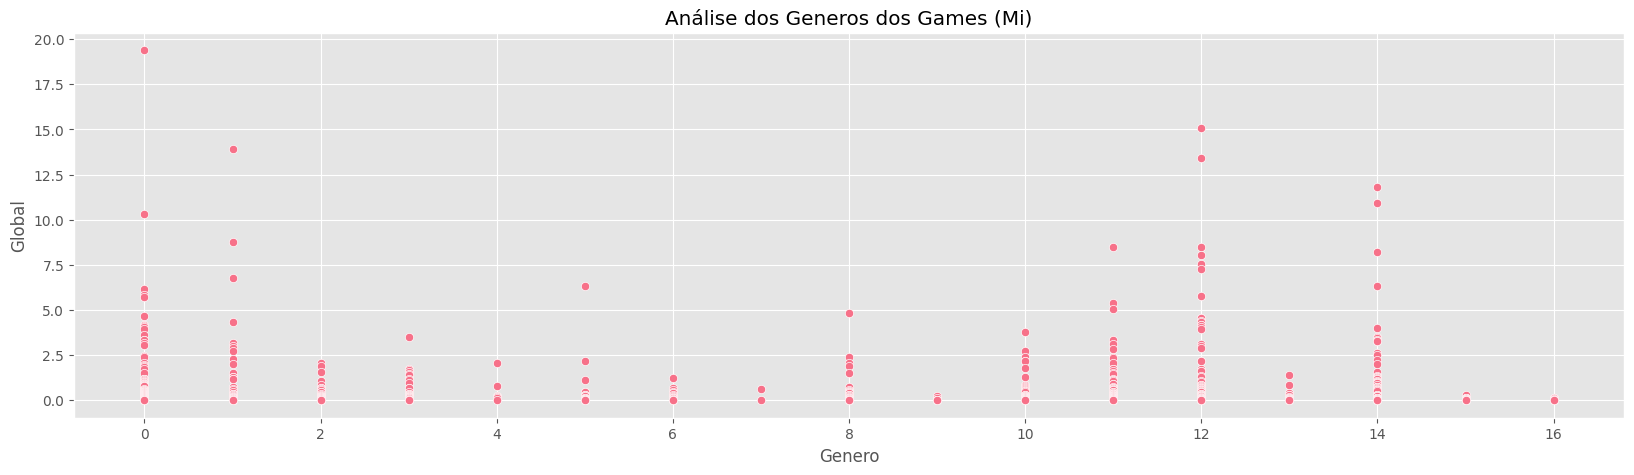

In [49]:
plt.figure(figsize=(20,5))
plt.title('Análise dos Generos dos Games (Mi)')
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=Paleta_Cores[0]);

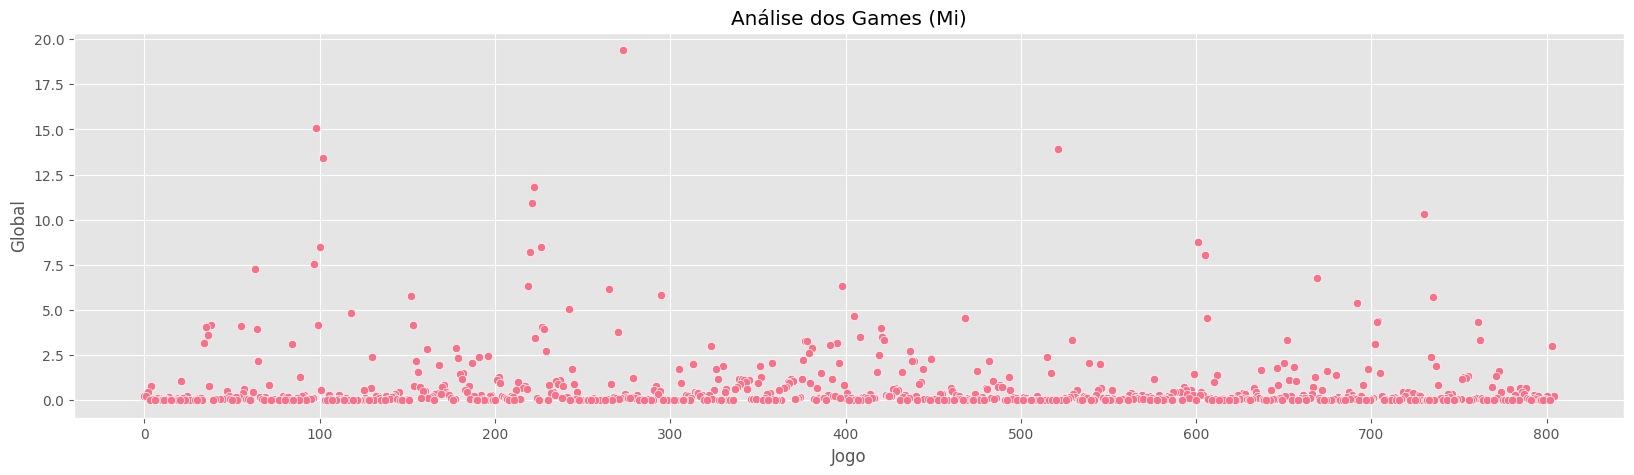

In [48]:
plt.figure(figsize=(20,5))
plt.title('Análise dos Games (Mi)')
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[0]);